# Breath of the Wild

In [28]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt

In [29]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [30]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [31]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Get equipment list

In [32]:
# create loop to get equipment data store to list.
for i in equipment_json:
    # create a dictionary for equipment to create DataFrame
    equipment_dict = {
        "name": i['name'],
        "attack": i['attack'],
        "defense": i['defense']
    }
    # add dictionary to list.
    equip_list.append(equipment_dict)

In [33]:
# Create DataFrame and save to .csv file
equipment_df = pd.DataFrame(equip_list).sort_values(by="name")
equipment_df.to_csv("BotW_equip_stats.csv", index=False)

# Get materials list

In [34]:
# get materials and add to list
for i in materials_json:
    # create a dictionary for materials to create DataFrame)
    material_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
     # add dictionary to list.
    materials.append(material_dict)

In [35]:
# Create DataFrame from dictionary
materials_df = pd.DataFrame(materials)

In [36]:
# add a 'none' to the cooking_effect that show a blank
materials_df["cooking_effect"] = ['none' if x == '' else x for x in materials_df['cooking_effect']]

In [37]:
# Preivew DataFrame
#materials_df

In [38]:
# save to .csv file
materials_df.to_csv("BotW_material_stats.csv", index=False)

# Get foods list

In [39]:
# get foods and add to list
for i in creatures_json:
    # create a dictionary for foods to create DataFrame)
    food_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
    # add dictionary to list.
    foods.append(food_dict)

In [40]:
# Create DataFrame
# add a 'none' to the foods that show a blank
foods_df = pd.DataFrame(foods).sort_values(by="name")
foods_df["cooking_effect"] = ['none' if x == '' else x for x in foods_df['cooking_effect']]

In [41]:
# save to .csv file
foods_df.to_csv("BotW_food_stats.csv", index=False)

# Get monster list ID

In [42]:
# get foods and add to list
for i in monsters_json:
    # create a dictionary for monsters to create DataFrame)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    # add dictionary to list.
    monsters.append(monster_dict)

In [43]:
# Create DataFrame and save to .csv file
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")
monsters_df.to_csv("BotW_monster_list.csv", index=False)
monsters_df = monsters_df.set_index("id")
monsters_df

,name
id,
105,black bokoblin
149,black hinox
115,black lizalfos
110,black moblin
101,blizzrobe
...,...
161,waterblight ganon
123,white-maned lynel
162,windblight ganon


# Union foods and materials

In [44]:
# union materials df and foods df into a new DataFrame
consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [45]:
consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [46]:
# Save consumables to a csv file
consumables_df.to_csv("BotW_consumables.csv", index=False)

# Get drops ID


In [47]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)
# set the index of the dataframe to the id (will be handy when you split your entries next)
drops_df.set_index(drops_df['id'],inplace=True)
# split each item in  the df['drops'] and send it to a new row. Setting the index above allows us to 
# keep the index intact when we split them. 
drops_df = drops_df.explode('drops')
# Filter the dataframe to keep only the column that we need
drops_df[['drops']]

,drops
id,
147,hinox toenail
147,hinox tooth
147,hinox guts
147,apple
147,wildberry
...,...
129,ancient gear
129,ancient shaft
92,octorok tentacle


In [48]:
drops_df.to_csv("BotW_drop.csv")

In [22]:
# create dataframe to hold drop counts
drops_count_df = pd.DataFrame(drops_df.index.value_counts())
# Renme id column to 'drop_counts'
drops_count_df = drops_count_df.rename(columns={"id":"drop_count"})

In [23]:
# rename index to 'id'
drops_count_df.index.name = "id"
drops_count_df

,drop_count
id,
112,18
149,18
124,16
127,12
148,12
...,...
153,1
87,1
86,1


In [24]:
# Merge drop_counts_df and mosnters_df to obtain total count of drops
# for a monster
calamity_df = pd.merge(monsters_df, drops_count_df, how="outer", on="id")
calamity_df = calamity_df.sort_values(by="drop_count", ascending=False)

In [25]:
# Save new DataFrame to csv file
calamity_df
calamity_df.to_csv("BotW_drop_counts.csv")

## Let's get into the game details

## how many defense weapons are there and which is the best one?

In [87]:
# Bring equipment table
equipment_df = equipment_df.fillna(0).sort_values(by="defense", ascending=False)
equipment_df

,name,attack,defense
38,hylian shield,0.0,90.0
24,royal guard's shield,0.0,70.0
26,ancient shield,0.0,70.0
59,savage lynel shield,0.0,62.0
60,royal shield,0.0,55.0
...,...,...,...
21,soup ladle,4.0,0.0
148,traveler's bow,5.0,0.0
96,lightning rod,5.0,0.0
146,bokoblin arm,5.0,0.0


In [141]:
# create Defense Df for barchart
# set variables to hols name and defense
equipment = equipment_df["name"]
#convert floats to ints
defense = equipment_df["defense"].astype(int)
defense_bar_df = pd.DataFrame({"Equipment":equipment, "Defense":defense})
defense_bar_df = defense_bar_df[defense_bar_df['Defense'] !=0]
defense_bar_df = defense_bar_df.set_index("Equipment")

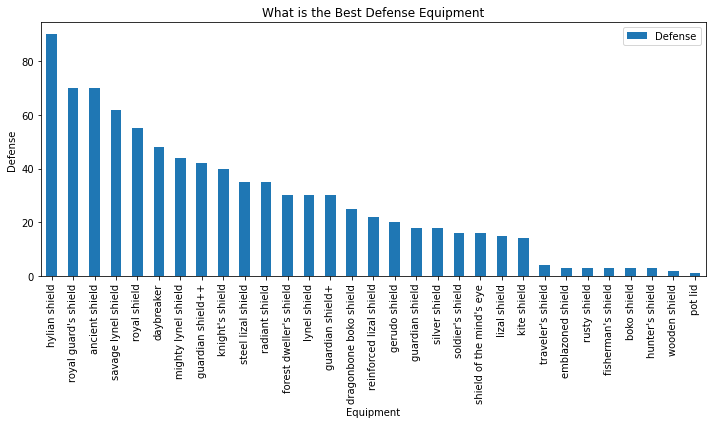

In [144]:
# plot bar chart from DataFrame
fig, ax = plt.subplots()
defense_bar_df.plot(kind="bar", figsize=(10,6), ax=ax, 
                  title="What is the Best Defense Equipment",
                  xlabel="Equipment",
                  ylabel="Defense");
fig.tight_layout();
plt.savefig("../BotW/images/defense_bar.png")